In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("covid.csv")

In [16]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [17]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [18]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [19]:
df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [20]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [21]:
df.isin(['-']).sum()

Sno                             0
Date                            0
Time                            0
State/UnionTerritory            0
ConfirmedIndianNational     17664
ConfirmedForeignNational    17664
Cured                           0
Deaths                          0
Confirmed                       0
dtype: int64

In [22]:
import pandas as pd

# Assuming df is your DataFrame
# First, convert '-' to NaN in the relevant columns
df['ConfirmedIndianNational'] = pd.to_numeric(df['ConfirmedIndianNational'].replace('-', np.nan), errors='coerce')
df['ConfirmedForeignNational'] = pd.to_numeric(df['ConfirmedForeignNational'].replace('-', np.nan), errors='coerce')

# Calculate percentages and round off
df['ConfirmedIndianNational'] = df['ConfirmedIndianNational'].fillna(0) + round(0.9 * df['Confirmed'])
df['ConfirmedForeignNational'] = df['ConfirmedForeignNational'].fillna(0) + round(0.1 * df['Confirmed'])

# Round off to the nearest integer
df['ConfirmedIndianNational'] = df['ConfirmedIndianNational'].astype(int)
df['ConfirmedForeignNational'] = df['ConfirmedForeignNational'].astype(int)


In [23]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,2,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,2,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,4,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,6,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,6,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,585318,65035,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,72594,8066,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,308216,34246,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,1537931,170881,1685492,22775,1708812


In [24]:
df.isin(['-']).sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [25]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [30]:
df.describe()

,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.709286e+05,30103.172501,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,5.905338e+05,65614.873953,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.938750e+03,438.000000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.579600e+04,3977.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.701350e+05,30014.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,5.727098e+06,636344.000000,6.159676e+06,134201.000000,6.363442e+06


<Axes: ylabel='Frequency'>

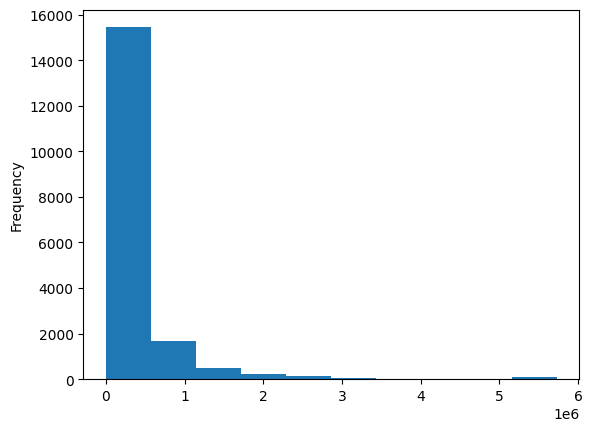

In [40]:
df["ConfirmedIndianNational"].plot(kind="hist")

<Axes: ylabel='Frequency'>

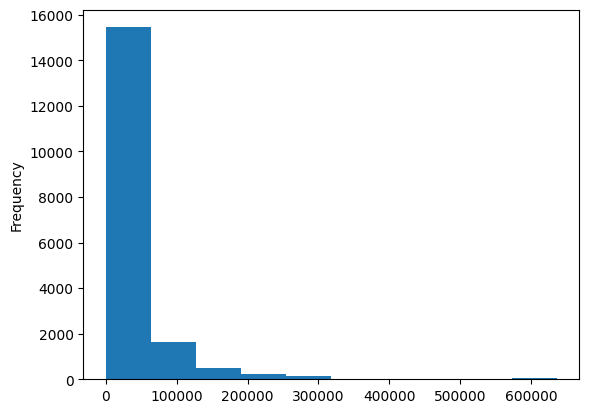

In [44]:
df["ConfirmedForeignNational"].plot(kind="hist")

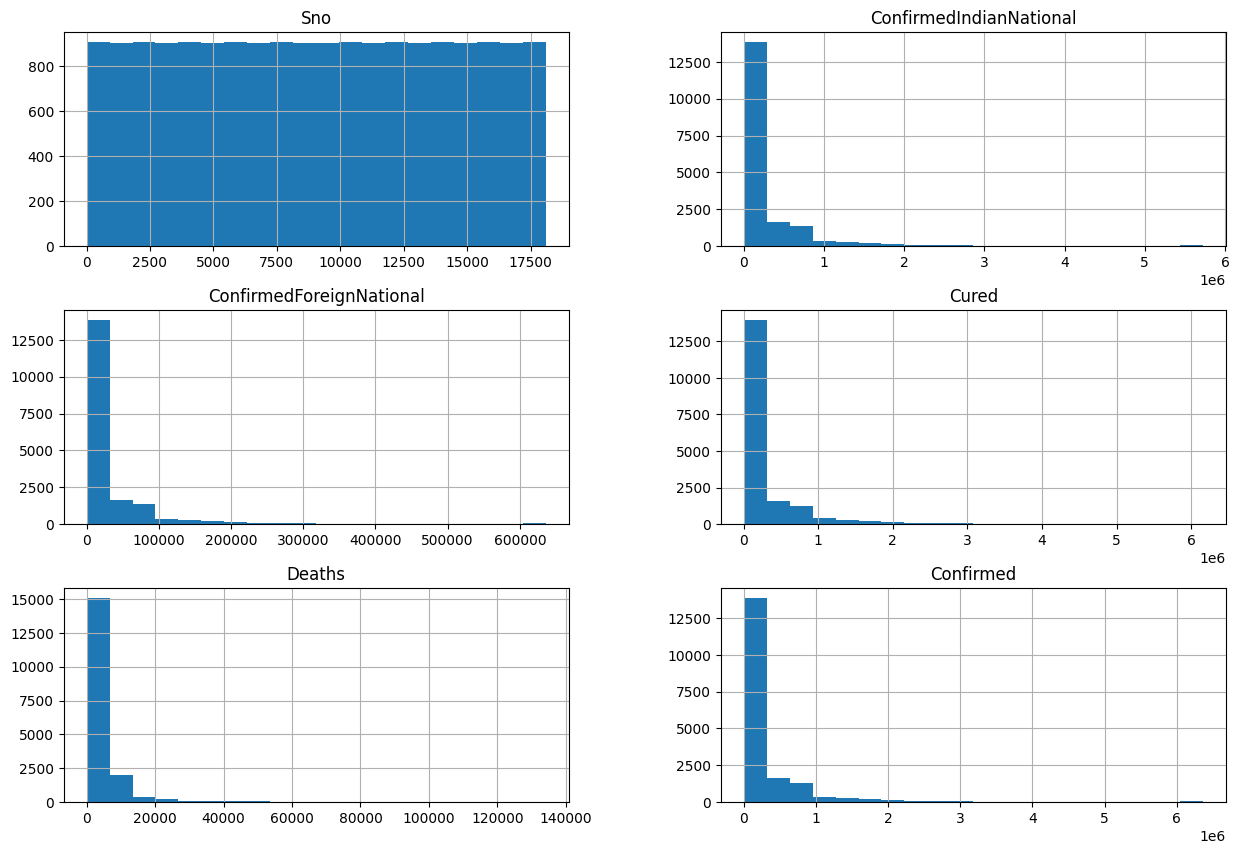

In [43]:
df.hist(figsize=(15, 10), bins=20)
plt.show()

In [53]:
covid = df.iloc[: , 4:]
covid

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2,0,0,0,1
1,2,0,0,0,1
2,4,0,0,0,2
3,6,0,0,0,3
4,6,0,0,0,3
...,...,...,...,...,...
18105,585318,65035,638410,3831,650353
18106,72594,8066,77811,773,80660
18107,308216,34246,334650,7368,342462
18108,1537931,170881,1685492,22775,1708812


Text(0, 0.5, 'Deaths')

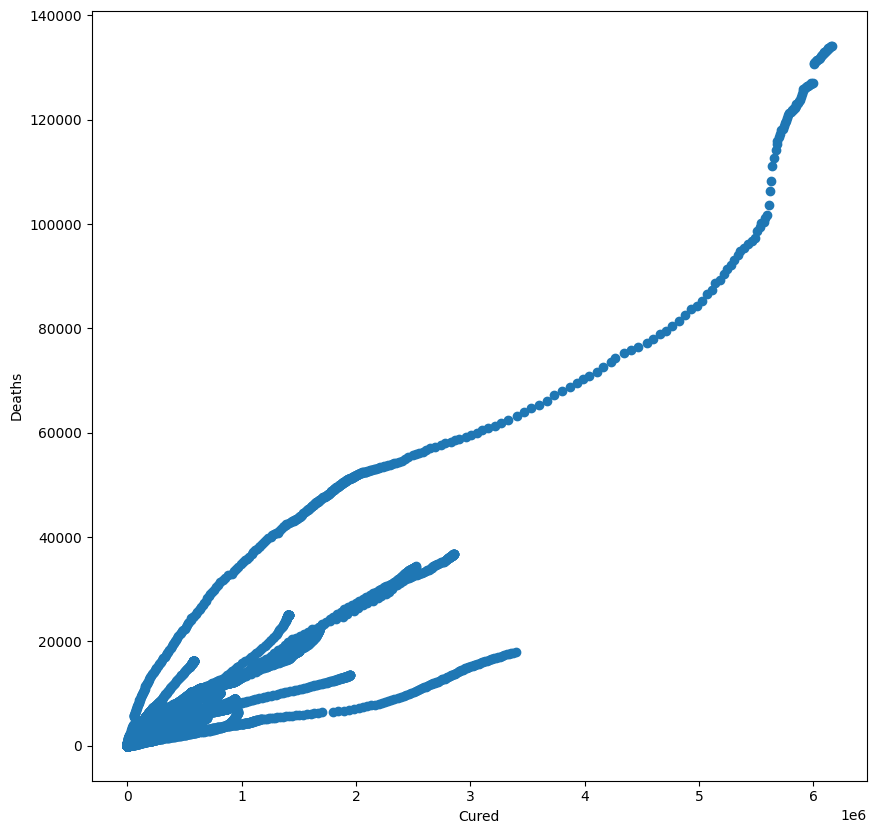

In [58]:
plt.figure(figsize=(10,10))
plt.scatter(x='Cured',y='Deaths',data=df)
plt.xlabel('Cured')
plt.ylabel('Deaths')

Text(0, 0.5, 'Deaths')

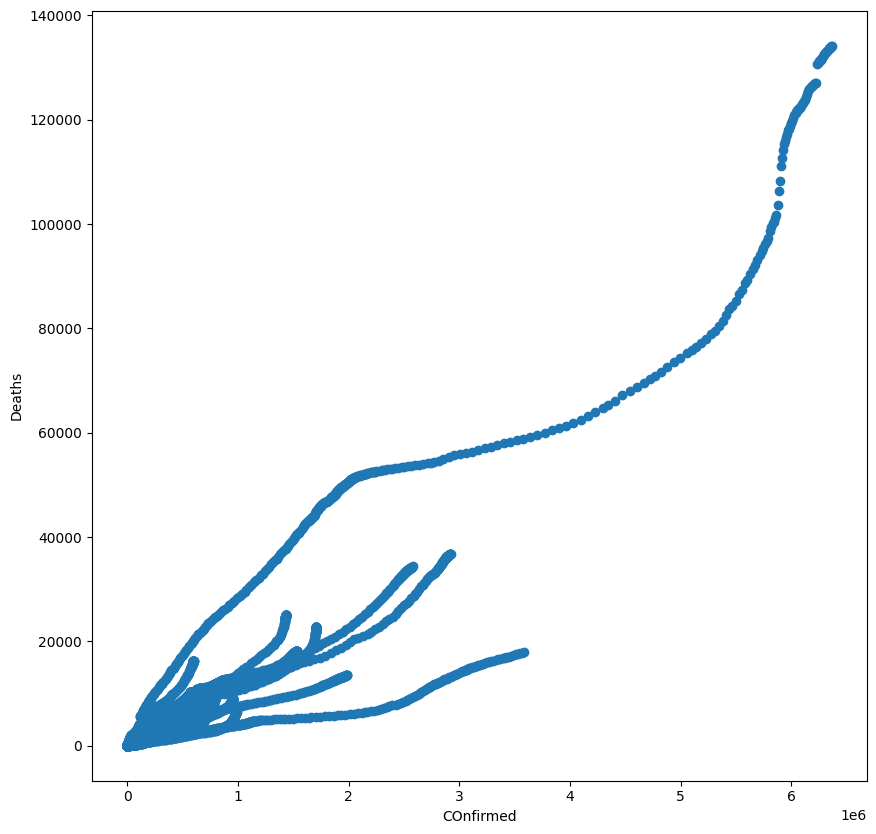

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(x='Confirmed',y='Deaths',data=df)
plt.xlabel('Confirmed')
plt.ylabel('Deaths')

Text(0, 0.5, 'ConfirmedForeignNational')

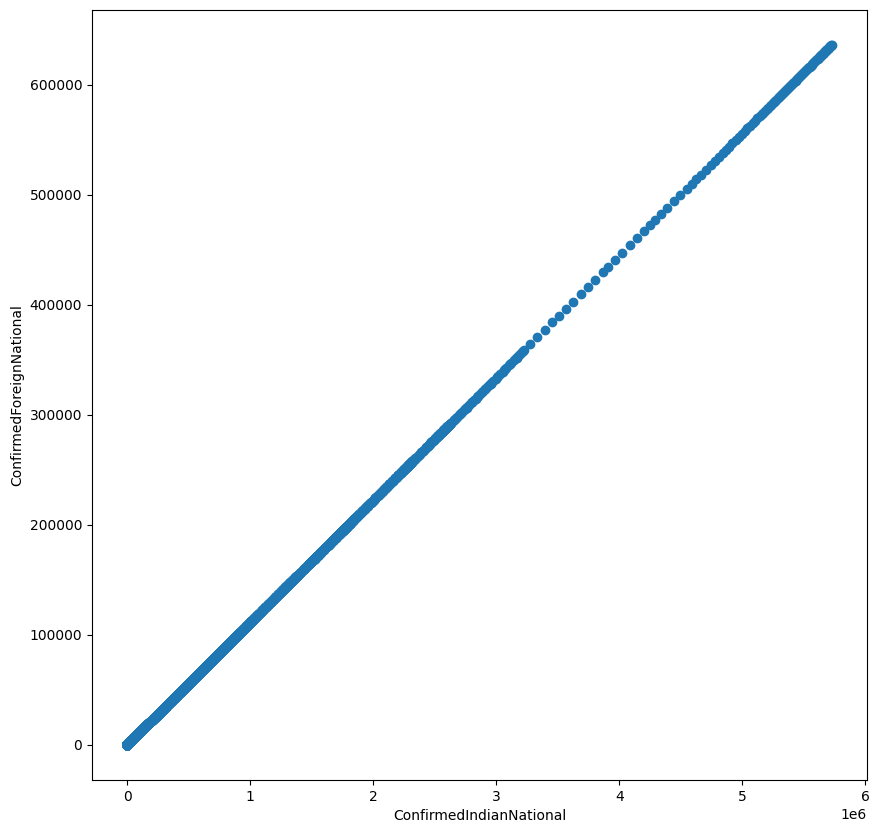

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(x='ConfirmedIndianNational',y='ConfirmedForeignNational',data=df)
plt.xlabel('ConfirmedIndianNational')
plt.ylabel('ConfirmedForeignNational')

In [61]:
df['ConfirmedIndianNational'].skew()


4.851306623649408

In [62]:
df['ConfirmedForeignNational'].skew()

4.851306671067264